<a href="https://colab.research.google.com/github/agusjanardana/tubes-statistika/blob/main/Kelompok23_IF_43_GAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Statistika

Anggota Kelompok 23:
- I Gde Bagus Janardana Abasan (1301190061)
- Muhammad Zaky Al Fatih (1301190445)
- Muhamad Faishal Irawan (1301194262)

Tujuan eksplorasi: Mendapat gambaran tentang karakteristik pemegang kartu kredit dari suatu bank

# Sumber data

Data bersumber dari https://www.kaggle.com/sakshigoyal7/credit-card-customers. Data didownload dan diimport ke dalam notebook dalam format .csv.

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Sudah mengupload file dengan nama "{name}" dan panjang {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
data = pd.read_csv(io.StringIO(uploaded['BankChurners.csv'].decode('utf-8')))

Saving BankChurners.csv to BankChurners.csv
Sudah mengupload file dengan nama "BankChurners.csv" dan panjang 1394543 bytes


In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Metode

Metode yang akan kami gunakan adalah sebagai berikut:

1. **Korelasi**, mencari korelasi antara status pernikahan dengan pendapatan
2. **Box Plot**, mencari penyebaran jangka waktu hubungan pemegang kartu kredit dengan bank menggunakan pengelompokkan box plot
3. **Diagram Batang**, mencari income category pemegang kartu kredit terbanyak dan tersedikit
4. **Heat Map**, Mencari heatmap dari income catagory dan customer age, dimana customer age kita sudah menjadikannya sebagai age-range agar mempermudah pengerjaannya dan pemahaman.
5. **Histogram**,total_amt_change_q4_q1, mencari perubahan amount dalam beberapa bin pada histogram ini

## **Data Wrangling**

Menghapus kolom data yang tidak digunakan. Kolom yang kami gunakan adalah status pernikahan (Marital_Status), pendapatan (Income_Category),  jangka waktu hubungan pemegang kartu kredit dengan bank (Months_on_book), limit kredit (Credit_Limit), perubahan jumlah transaksi dari Q1 sampai Q4 (Total_Amt_Chng_Q4_Q1).

In [ ]:
# Menghapus kolom data selain yang digunakan
# ref: https://stackoverflow.com/a/53214704/7936248

data = data.filter(['Marital_Status', 'Income_Category', 'Total_Amt_Chng_Q4_Q1' ,'Customer_Age'])
data

,Marital_Status,Income_Category,Total_Amt_Chng_Q4_Q1,Customer_Age
0,Married,$60K - $80K,1.335,45
1,Single,Less than $40K,1.541,49
2,Married,$80K - $120K,2.594,51
3,Unknown,Less than $40K,1.405,40
4,Married,$60K - $80K,2.175,40
...,...,...,...,...
10122,Single,$40K - $60K,0.703,50
10123,Divorced,$40K - $60K,0.804,41
10124,Married,Less than $40K,0.819,44
10125,Unknown,$40K - $60K,0.535,30


## **Korelasi**

Mencari korelasi antara status pernikahan dengan pendapatan

In [ ]:
# Mengubah data kategori menjadi nomor agar dapat diproses
# ref: https://stackoverflow.com/a/38089089/7936248

data.Marital_Status = pd.Categorical(data.Marital_Status)
data['Marital_Status_Cat'] = data.Marital_Status.cat.codes

data.Income_Category = pd.Categorical(data.Income_Category)
data['Income_Category_Cat'] = data.Income_Category.cat.codes

data[['Marital_Status_Cat', 'Income_Category_Cat']]

,Marital_Status_Cat,Income_Category_Cat
0,1,2
1,2,4
2,1,3
3,3,4
4,1,2
...,...,...
10122,2,1
10123,0,1
10124,1,4
10125,3,1


In [ ]:
# Korelasi antara status pernikahan dengan pendapatan
# ref: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-pandas-correlation-calculation, https://www.w3schools.com/python/pandas_correlations.asp

data['Marital_Status_Cat'].corr(data['Income_Category_Cat'])

0.009659178565751525

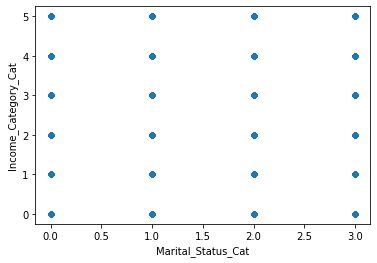

In [ ]:
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

data.plot.scatter(x='Marital_Status_Cat',y='Income_Category_Cat')

Hasil:

Korelasi antara status pernikahan dengan pendapatan pengguna kartu kredit adalah 0,0097. Karena korelasi mendekati nilai 0, dan titik-titik pada scatter plot menyebar ini menyatakan bahwa hampir tidak terdapat hubungan antara status pernikahan dengan jumlah pendapatan pengguna kartu kredit. 



## **Box Plot**

Mencari penyebaran jangka waktu hubungan pemegang kartu kredit dengan bank menggunakan pengelompokkan box plot

In [ ]:
# Kuartil 1, 2, 3
# ref: https://stackoverflow.com/a/45926291/7936248, https://stackoverflow.com/questions/55009203/how-does-pandas-calculate-quartiles, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

data.Months_on_book.quantile([0.25,0.5,0.75])

0.25    31.0
0.50    36.0
0.75    40.0
Name: Months_on_book, dtype: float64

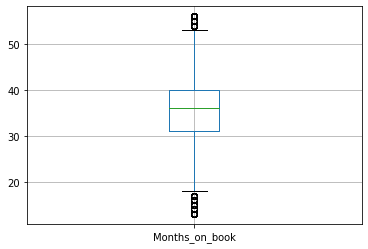

In [ ]:
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

data.boxplot(column=['Months_on_book'])

Hasil:

Secara umum, boxplot digunakan untuk menilai kesimetrisan data. Dari data pada kolum Months on book, didapatkan bahwasannya data ini tidak simetris alias median , upperwhisker, dan bottom whisker tidak memiliki panjang yang sama dilihat dari visualnya. Boxplot ini lebih condong ke bawah dimana jarak median dan bottomwhiskernya lebih panjang, sehingga data tidak simetris.

## **Diagram Batang**

Mencari income category pemegang kartu kredit terbanyak dan tersedikit

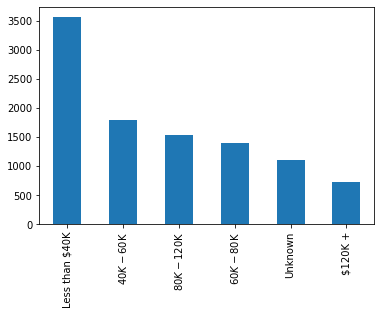

In [ ]:
# ref: https://stackoverflow.com/a/53953905/7936248

data['Income_Category'].value_counts().plot.bar()

Hasil:

Dengan menggunakan metode diagram batang, Kami mendapatkan kesimpulan bahwa kelompok pendapatan yang bernilai kurang dari \$40K memilki frekuensi yang paling banyak, sedangkan kelompok pendapatan yang bernilai lebih dari $120K memiliki frekuensi paling sedikit.

## **Heat Map**
Mencari heatmap dari income catagory dan customer age, dimana customer age kita sudah menjadikannya sebagai age-range agar mempermudah pengerjaannya dan pemahaman.

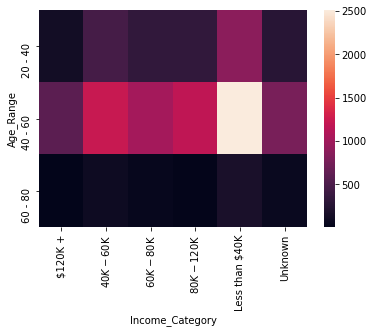

In [ ]:
# ref : https://pbpython.com/pandas-crosstab.html

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

age_bins = [20, 40, 60, 80]
age_labels = ['20 - 40', '40 - 60', '60 - 80']
data['Age_Range'] = pd.cut(data['Customer_Age'], age_bins, labels=age_labels, ordered=True)
crosstab = pd.crosstab(data['Age_Range'], data['Income_Category'])
sns.heatmap(crosstab)

Hasil:

Dari visulisasi diatas, pada dasarnya range  umur dengan penghasilan akan dilihat ada berapa banyak data. Bisa disimpulkan secara sederhana, umur rentang 60-80 , dimana datanya sekitar 500 kebawah baik dari unknown-120k secara signifikan sama. Rentang umur 40-60 penghasilannya dari unknown-120k berkisar diatas 500 data. Sedangkan, rentang umur 20-40 penghasilannya juga berkisar diatas 500 data.



## **Histogram**

total_amt_change_q4_q1, mencari perubahan amount dalam beberapa bin pada histogram ini

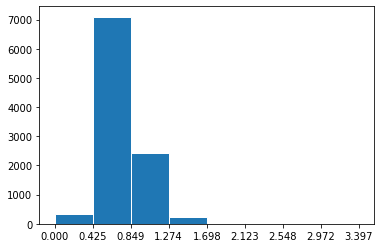

In [ ]:
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html, https://stackoverflow.com/a/57008375/7936248, https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas

n, bins, patches = plt.hist(data['Total_Amt_Chng_Q4_Q1'], edgecolor='white', bins=8)
plt.xticks(bins)
plt.show()


Hasil:

Pada Histogram kami mencari persebaran data BIN pada data['Total_Amt_Chng_Q4_Q1']. Kami mendapatkan nilai MAX sebesar 3,397 dan nilai MIN sebesar 0 sehingga kami mendapatkan Lebar BIN nya adalah 3,397. Pada histogram ini, kami memilih histogram dengan total 8 BIN, sehingga didapatkan histogram seperti diatas. Kami dapatkan bahwa nilai BIN kedua yang bernilai 0,84925 memiliki frekuensi yang paling tinggi.


# Kesimpulan

Dari hasil pengolahan data yang telah kami lakukan berdasarkan lima metode pengolahan data, kami mendapatkan kesimpulan bahwa:
1.	Dari hasil korelasi yang kami dapatkan, dapat disimpulkan bahwa hampir tidak terdapat hubungan antara ['Marital_Status'] dengan ['Income_Category']

2.	Dari hasil boxplot yang kami dapatkan, dapat disimpulkan bahwa boxplot dari kolom ['Months_on_book'] lebih condong kebawah sehingga boxplot tersebut tidak simetris  

3.	Dengan menggunakan metode diagram batang, kami mendapatkan kesimpulan bahwa frekuensi terbanyak pada data tersebut dipegang oleh orang-orang yang berpenghasilan dibawah \$40K, dan frekuensi paling sedikit dipegang oleh kelompok orang yang berpenghasilan diatas $120K

4.	Pada Heatmap yang kami buat, dapat disimpulkan bahwa rentang usia 60-80 memiliki jumlah frekuensi paling sedikit, dengan rentang frekuensi <500 data. Untuk rentang usia 20-40 memiliki jumlah frekuensi yang sedang dengan rentang frekuensi 500 < x < 1300. Sedangkan rentang usia 40-60 memiliki jumlah frekuensi terbanyak, sehingga terlihat pembagian warna ['Income_Category'] yang signifikan/kontras

5.	Dengan histogram dengan BIN berjumlah=8, kami mendapatkan bahwa jummlah data dengan rentang 0,425 < x < 0,849 memiliki frekuensi yang paling banyak
